In [1]:
import os
import sys
import pdb
import copy
import importlib
import numpy as np
import xarray as xr
import cmasher as cmr
import matplotlib as mpl
from matplotlib import rc
from datetime import datetime
from matplotlib import gridspec
import matplotlib.pyplot as plt
from cftime import DatetimeNoLeap as date
from matplotlib.dates import DateFormatter

plt.rcParams.update({
    'font.size'       : 14,   # Base font size
    'axes.labelsize'  : 14,   # Axis labels
    'xtick.labelsize' : 13,   # X-axis tick labels
    'ytick.labelsize' : 13,   # Y-axis tick labels
    'legend.fontsize' : 12,   # Legend font size
    'figure.titlesize': 16    # Figure title size
})
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
#mpl.rc('text', usetex = True)
#mpl.rc('font', family = 'serif')

plt.ioff()

sys.path.insert(1, '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC')
import plotting_utils as putil
import compute_ensemble_stats as ces
importlib.reload(putil)
importlib.reload(ces)

<module 'compute_ensemble_stats' from '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC/compute_ensemble_stats.py'>

In [2]:
importlib.reload(putil)
importlib.reload(ces)

# ------ midlatitude average

freq='monthly'
pmin, pmax = 2, 100

# ----- NH
latmin, latmax = 20, 40
vargs = {'skip_nosrctag':True, 'freq':freq,
         'latmin':latmin, 'latmax':latmax, 'pmin':pmin, 'pmax':pmax,
         'average_lat':True, 'average_time':False, 'average_pres':False}

dqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='aoa')
dqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='aoa')
dqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='aoa')
dqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='aoa')
dqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='aoa')
dqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='aoa')
aoa  = putil.get_variable('AOA', **vargs, mass=10)
aoatend = putil.get_variable('AOATEND', **vargs, mass=10)

# ----- eq
latmin, latmax = -5, 5
vargs = {'skip_nosrctag':True, 'freq':freq,
         'latmin':latmin, 'latmax':latmax, 'pmin':pmin, 'pmax':pmax,
         'average_lat':True, 'average_time':False, 'average_pres':False}

paoa  = putil.get_variable('AOA', **vargs, mass=10)
paoatend = putil.get_variable('AOATEND', **vargs, mass=10)
pdqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='aoa')
pdqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='aoa')
pdqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='aoa')
pdqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='aoa')
pdqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='aoa')
pdqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='aoa')

# ----- global at Jan 1992
vargs = {'skip_nosrctag':True, 'freq':freq,
         'pmin':pmin, 'pmax':pmax, 'tmin':date(1992,1,1), 'tmax':date(1992,2,1),
         'average_time':True, 'average_pres':False}

gaoa  = putil.get_variable('AOA', **vargs, mass=10)
gaoatend = putil.get_variable('AOATEND', **vargs, mass=10)
gdqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='aoa')
gdqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='aoa')
gdqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='aoa')
gdqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='aoa')
gdqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='aoa')
gdqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='aoa')

# ----- global at July 1992
vargs = {'skip_nosrctag':True, 'freq':freq,
         'pmin':pmin, 'pmax':pmax, 'tmin':date(1992,7,1), 'tmax':date(1992,8,1),
         'average_time':True, 'average_pres':False}

gsaoa  = putil.get_variable('AOA', **vargs, mass=10)
gsaoatend = putil.get_variable('AOATEND', **vargs, mass=10)
gsdqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='aoa')
gsdqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='aoa')
gsdqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='aoa')
gsdqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='aoa')
gsdqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='aoa')
gsdqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='aoa')


# ----- global at average
vargs = {'skip_nosrctag':True, 'freq':freq,
         'pmin':pmin, 'pmax':pmax, 'tmin':date(1994,1,1), 'tmax':date(1999,1,1),
         'average_time':True, 'average_pres':False}

gcaoa  = putil.get_variable('AOA', **vargs, mass=10)
gcaoatend = putil.get_variable('AOATEND', **vargs, mass=10)
gcdqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='aoa')
gcdqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='aoa')
gcdqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='aoa')
gcdqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='aoa')
gcdqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='aoa')
gcdqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='aoa')


# ---- dims
time = [datetime(t.year, t.month, t.day) for t in aoa['cfmean'].time.values]
plev = aoa['cfmean'].plev

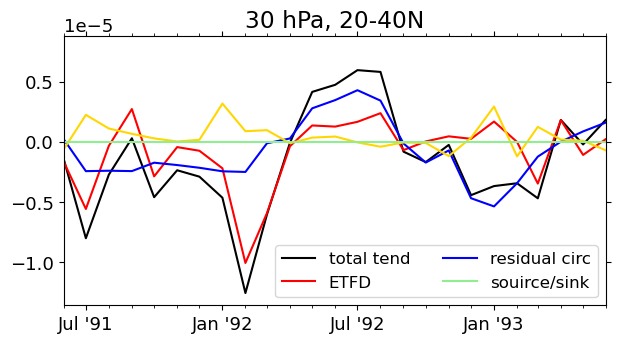

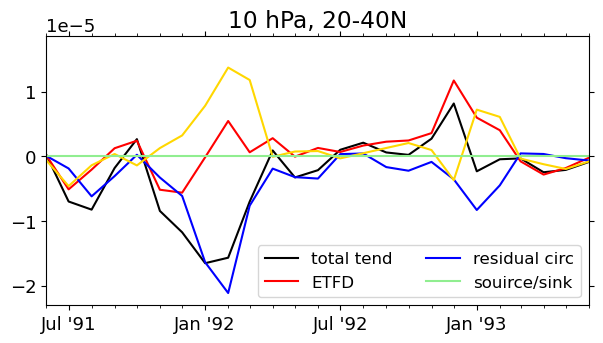

In [3]:
fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)

# -------- 30 hPa

pp = 30
ax.plot(time, dqdt['impact'].sel(plev=pp, method='nearest'), '-k', label='total tend')
ax.plot(time, dqdt_etfd['impact'].sel(plev=pp, method='nearest'), '-r', label='ETFD')
ax.plot(time, dqdt_resvel['impact'].sel(plev=pp, method='nearest'), '-b', label='residual circ')
ax.plot(time, dqdt_diff['impact'].sel(plev=pp, method='nearest'), color='gold')
ax.plot(time, (dqdt_source['impact'] + dqdt_sink['impact']).sel(plev=pp, method='nearest'), color='lightgreen', label='souirce/sink')
ax.set_xlim([datetime(1991,6,1), datetime(1993,6,1)])
ax.legend(loc='lower right', ncol=2)
putil.format_ticks(ax)
putil.season_timeticks(ax, option='solstice', times=time, include_year=True)
ax.set_title('{} hPa, 20-40N'.format(pp))

# -------- 10 hPa

fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)

pp = 10
ax.plot(time, dqdt['impact'].sel(plev=pp, method='nearest'), '-k', label='total tend')
ax.plot(time, dqdt_etfd['impact'].sel(plev=pp, method='nearest'), '-r', label='ETFD')
ax.plot(time, dqdt_resvel['impact'].sel(plev=pp, method='nearest'), '-b', label='residual circ')
ax.plot(time, dqdt_diff['impact'].sel(plev=pp, method='nearest'), color='gold')
ax.plot(time, (dqdt_source['impact'] + dqdt_sink['impact']).sel(plev=pp, method='nearest'), color='lightgreen', label='souirce/sink')
ax.set_xlim([datetime(1991,6,1), datetime(1993,6,1)])
ax.legend(loc='lower right', ncol=2)
putil.format_ticks(ax)
putil.season_timeticks(ax, option='solstice', times=time, include_year=True)
ax.set_title('{} hPa, 20-40N'.format(pp))

plt.show()

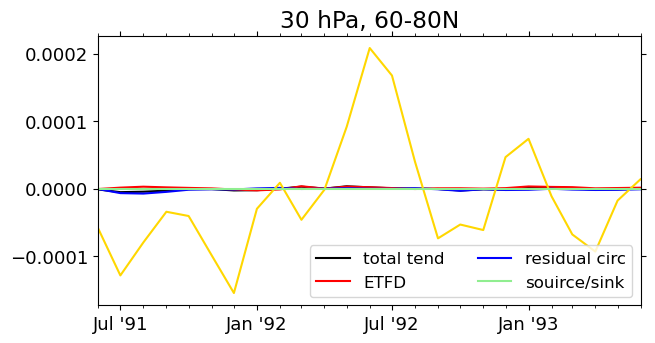

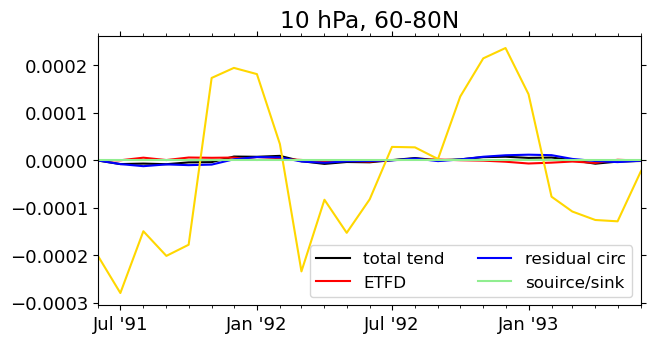

In [4]:
# -------- 30 hPa
fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)
pp = 30
ax.plot(time, pdqdt['impact'].sel(plev=pp, method='nearest'), '-k', label='total tend')
ax.plot(time, pdqdt_etfd['impact'].sel(plev=pp, method='nearest'), '-r', label='ETFD')
ax.plot(time, pdqdt_resvel['impact'].sel(plev=pp, method='nearest'), '-b', label='residual circ')
ax.plot(time, pdqdt_diff['impact'].sel(plev=pp, method='nearest'), color='gold')
ax.plot(time, (pdqdt_source['impact'] + pdqdt_sink['impact']).sel(plev=pp, method='nearest'), color='lightgreen', label='souirce/sink')
ax.set_xlim([datetime(1991,6,1), datetime(1993,6,1)])
ax.legend(loc='lower right', ncol=2)
putil.format_ticks(ax)
putil.season_timeticks(ax, option='solstice', times=time, include_year=True)
ax.set_title('{} hPa, 60-80N'.format(pp))

# -------- 10 hPa

fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)

pp = 10
ax.plot(time, pdqdt['impact'].sel(plev=pp, method='nearest'), '-k', label='total tend')
ax.plot(time, pdqdt_etfd['impact'].sel(plev=pp, method='nearest'), '-r', label='ETFD')
ax.plot(time, pdqdt_resvel['impact'].sel(plev=pp, method='nearest'), '-b', label='residual circ')
ax.plot(time, pdqdt_diff['impact'].sel(plev=pp, method='nearest'), color='gold')
ax.plot(time, (pdqdt_source['impact'] + pdqdt_sink['impact']).sel(plev=pp, method='nearest'), color='lightgreen', label='souirce/sink')
ax.set_xlim([datetime(1991,6,1), datetime(1993,6,1)])
ax.legend(loc='lower right', ncol=2)
putil.format_ticks(ax)
putil.season_timeticks(ax, option='solstice', times=time, include_year=True)
ax.set_title('{} hPa, 60-80N'.format(pp))

plt.show()

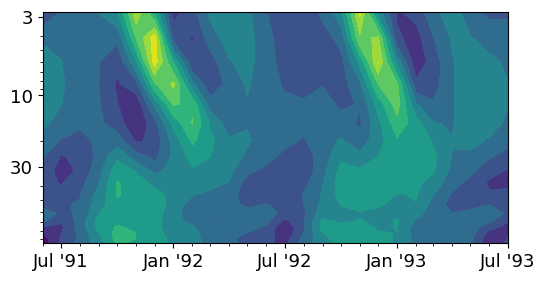

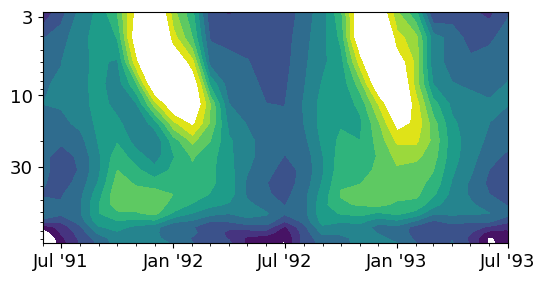

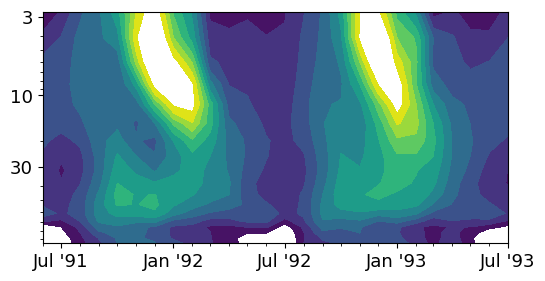

In [5]:
#AOATEND = {}
#AOATEND['cfmean'] = dqdt['cfmean'] + dqdt_diff['cfmean']
#AOATEND['impact'] = dqdt['impact'] + dqdt_diff['impact']
plev = aoatend['cfmean'].plev

plt.figure(figsize=(6,3))
aoacf = plt.contourf(time, plev, aoatend['cfmean'], levels=10)
putil.format_paxis(plt.gca())
plt.xlim([datetime(1991,6,1), datetime(1993,7,1)])
putil.season_timeticks(plt.gca(), time, 'solstice', include_year=True)

plt.figure(figsize=(6,3))
plt.contourf(time, plev, dqdt['cfmean'], levels=aoacf.levels)
putil.format_paxis(plt.gca())
plt.xlim([datetime(1991,6,1), datetime(1993,7,1)])
putil.season_timeticks(plt.gca(), time, 'solstice', include_year=True)

plt.figure(figsize=(6,3))
plt.contourf(time, plev, dqdt['cfmean'] - dqdt_source['cfmean'], levels=aoacf.levels)
putil.format_paxis(plt.gca())
plt.xlim([datetime(1991,6,1), datetime(1993,7,1)])
putil.season_timeticks(plt.gca(), time, 'solstice', include_year=True)

plt.show()

In [6]:
gcf.levels

NameError: name 'gcf' is not defined

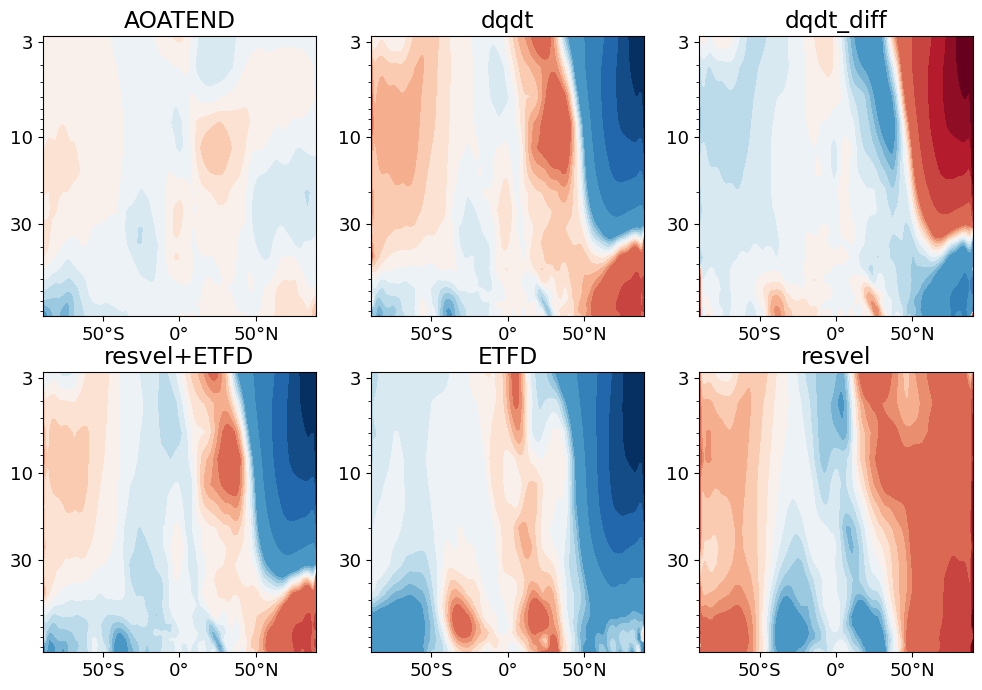

In [7]:
levels = np.hstack([np.array([-60, -45, -30, -15]), np.arange(-5, 5.1, 1), np.array([15, 30, 45, 60])])*1e-5
norm = putil.get_cmap_norm(levels, 'uneven')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# --- measured AOATEND
gcf = ax1.contourf(gaoa['cfmean'].lat, gaoa['cfmean'].plev, gaoatend['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax1)
putil.format_lataxis(ax1)
ax1.set_title('AOATEND')

# ---- resvel+ETFD
ax4.contourf(gaoa['cfmean'].lat, gaoa['cfmean'].plev, gdqdt_resvel['cfmean'].T + gdqdt_etfd['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax4)
putil.format_lataxis(ax4)
ax4.set_title('resvel+ETFD')

# --- cumulative tendency
ax2.contourf(gaoa['cfmean'].lat, gaoa['cfmean'].plev, gdqdt['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax2)
putil.format_lataxis(ax2)
ax2.set_title('dqdt')

# ---- difference
ax3.contourf(gaoa['cfmean'].lat, gaoa['cfmean'].plev, gdqdt_diff['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax3)
putil.format_lataxis(ax3)
ax3.set_title('dqdt_diff')

# ---- etfd
ax5.contourf(gaoa['cfmean'].lat, gaoa['cfmean'].plev, gdqdt_etfd['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax5)
putil.format_lataxis(ax5)
ax5.set_title('ETFD')

# ---- resvel
ax6.contourf(gaoa['cfmean'].lat, gaoa['cfmean'].plev, gdqdt_resvel['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax6)
putil.format_lataxis(ax6)
ax6.set_title('resvel')

plt.show()

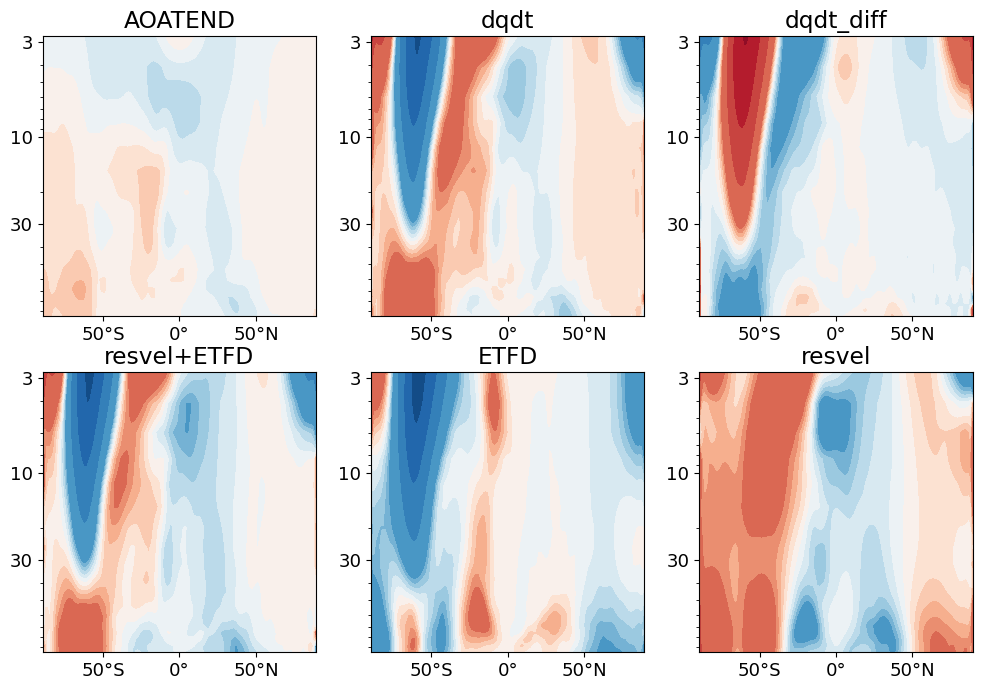

In [10]:
levels = np.hstack([np.array([-60, -45, -30, -15]), np.arange(-5, 5.1, 1), np.array([15, 30, 45, 60])])*1e-5
norm = putil.get_cmap_norm(levels, 'uneven')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# --- measured AOATEND
gcf = ax1.contourf(gsaoa['cfmean'].lat, gsaoa['cfmean'].plev, gsaoatend['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax1)
putil.format_lataxis(ax1)
ax1.set_title('AOATEND')

# ---- resvel+ETFD
ax4.contourf(gaoa['cfmean'].lat, gsaoa['cfmean'].plev, gsdqdt_resvel['cfmean'].T + gsdqdt_etfd['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax4)
putil.format_lataxis(ax4)
ax4.set_title('resvel+ETFD')

# --- cumulative tendency
ax2.contourf(gaoa['cfmean'].lat, gsaoa['cfmean'].plev, gsdqdt['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax2)
putil.format_lataxis(ax2)
ax2.set_title('dqdt')

# ---- difference
ax3.contourf(gaoa['cfmean'].lat, gsaoa['cfmean'].plev, gsdqdt_diff['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax3)
putil.format_lataxis(ax3)
ax3.set_title('dqdt_diff')

# ---- etfd
ax5.contourf(gaoa['cfmean'].lat, gsaoa['cfmean'].plev, gsdqdt_etfd['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax5)
putil.format_lataxis(ax5)
ax5.set_title('ETFD')

# ---- resvel
ax6.contourf(gaoa['cfmean'].lat, gsaoa['cfmean'].plev, gsdqdt_resvel['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax6)
putil.format_lataxis(ax6)
ax6.set_title('resvel')

plt.show()

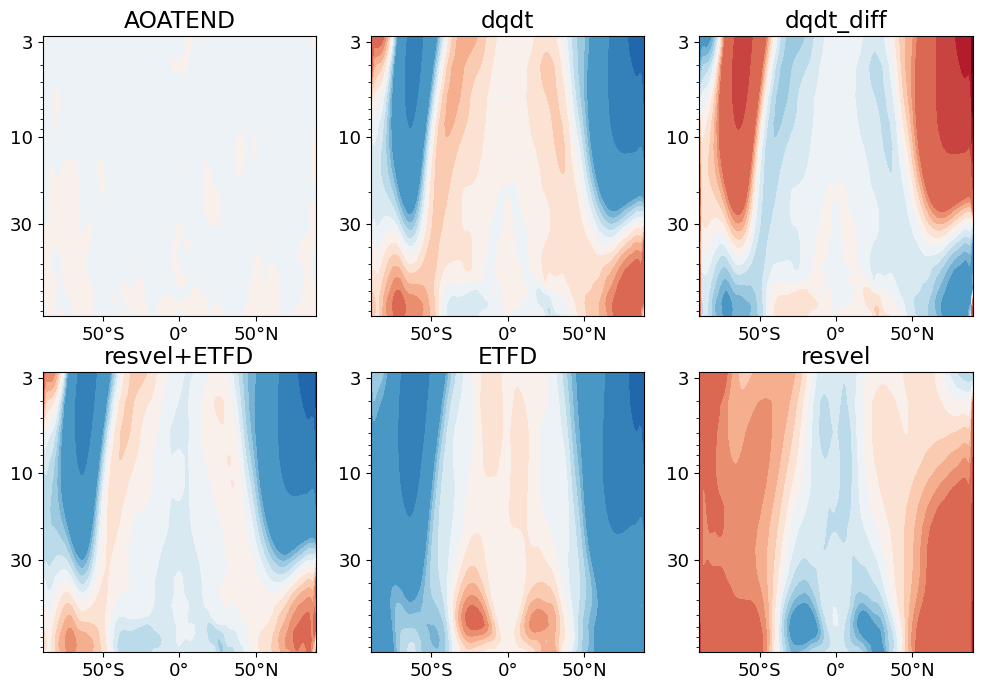

In [9]:
levels = np.hstack([np.array([-60, -45, -30, -15]), np.arange(-5, 5.1, 1), np.array([15, 30, 45, 60])])*1e-5
norm = putil.get_cmap_norm(levels, 'uneven')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# --- measured AOATEND
gcf = ax1.contourf(gcaoa['cfmean'].lat, gcaoa['cfmean'].plev, gcaoatend['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax1)
putil.format_lataxis(ax1)
ax1.set_title('AOATEND')

# ---- resvel+ETFD
ax4.contourf(gaoa['cfmean'].lat, gcaoa['cfmean'].plev, gcdqdt_resvel['cfmean'].T + gcdqdt_etfd['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax4)
putil.format_lataxis(ax4)
ax4.set_title('resvel+ETFD')

# --- cumulative tendency
ax2.contourf(gaoa['cfmean'].lat, gcaoa['cfmean'].plev, gcdqdt['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax2)
putil.format_lataxis(ax2)
ax2.set_title('dqdt')

# ---- difference
ax3.contourf(gaoa['cfmean'].lat, gcaoa['cfmean'].plev, gcdqdt_diff['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax3)
putil.format_lataxis(ax3)
ax3.set_title('dqdt_diff')

# ---- etfd
ax5.contourf(gaoa['cfmean'].lat, gcaoa['cfmean'].plev, gcdqdt_etfd['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax5)
putil.format_lataxis(ax5)
ax5.set_title('ETFD')

# ---- resvel
ax6.contourf(gaoa['cfmean'].lat, gcaoa['cfmean'].plev, gcdqdt_resvel['cfmean'].T, levels=levels, norm=norm, cmap='RdBu_r', extend='both')
putil.format_paxis(ax6)
putil.format_lataxis(ax6)
ax6.set_title('resvel')

plt.show()